## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [9]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
path = r'C:\Users\djval\Google Drive\Career\Career Foundry\Data Immerson\Achievement 6\01-2022 COVID 19 Impact on Trade Analysis'

In [11]:
path

'C:\\Users\\djval\\Google Drive\\Career\\Career Foundry\\Data Immerson\\Achievement 6\\01-2022 COVID 19 Impact on Trade Analysis'

In [12]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','continents - Global 2019 - 2021.csv'))

In [13]:
df.shape

(288, 11)

In [14]:
df.head()

,continent,year,month,US_imports,US_exports,US_trade_deficit,US_ unemployment_rate,US_housing_price_index,number_of_covid_cases_US,number_of_covid_deaths,global_container_freight_index
0,Africa,2019,Jan,2662.223523,1725.373398,-936.850125,4.0,264.58,0,0,1324
1,Africa,2019,Feb,1742.160449,1927.257731,185.097282,3.8,266.36,0,0,1324
2,Africa,2019,Mar,2585.382645,2664.743811,79.361166,3.8,269.34,0,0,1324
3,Africa,2019,Apr,2605.059567,2247.018589,-358.040978,3.6,272.38,0,0,1324
4,Africa,2019,May,3332.941796,2389.686079,-943.255717,3.6,275.21,0,0,1324


In [15]:
df_2 = df.drop(columns = ['continent','month'])

In [16]:
df_2.head()

,year,US_imports,US_exports,US_trade_deficit,US_ unemployment_rate,US_housing_price_index,number_of_covid_cases_US,number_of_covid_deaths,global_container_freight_index
0,2019,2662.223523,1725.373398,-936.850125,4.0,264.58,0,0,1324
1,2019,1742.160449,1927.257731,185.097282,3.8,266.36,0,0,1324
2,2019,2585.382645,2664.743811,79.361166,3.8,269.34,0,0,1324
3,2019,2605.059567,2247.018589,-358.040978,3.6,272.38,0,0,1324
4,2019,3332.941796,2389.686079,-943.255717,3.6,275.21,0,0,1324


In [17]:
# Check for missing values

df_2.isnull().sum() # No missing values to handle

year                              0
US_imports                        0
US_exports                        0
US_trade_deficit                  0
US_ unemployment_rate             0
US_housing_price_index            0
number_of_covid_cases_US          0
number_of_covid_deaths            0
global_container_freight_index    0
dtype: int64

### 2. The elbow technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\djval\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[-1045687984786224.9,
 -235738040909167.1,
 -82673615901233.6,
 -34294806673628.543,
 -11418910461367.264,
 -6223726611191.623,
 -3383805177009.197,
 -2103088103662.9263,
 -1709887481217.0608]

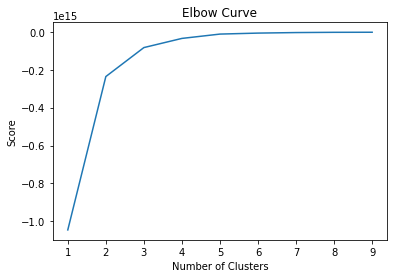

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [22]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\djval\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [23]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\djval\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [24]:
df_2.head()

,year,US_imports,US_exports,US_trade_deficit,US_ unemployment_rate,US_housing_price_index,number_of_covid_cases_US,number_of_covid_deaths,global_container_freight_index,clusters
0,2019,2662.223523,1725.373398,-936.850125,4.0,264.58,0,0,1324,1
1,2019,1742.160449,1927.257731,185.097282,3.8,266.36,0,0,1324,1
2,2019,2585.382645,2664.743811,79.361166,3.8,269.34,0,0,1324,1
3,2019,2605.059567,2247.018589,-358.040978,3.6,272.38,0,0,1324,1
4,2019,3332.941796,2389.686079,-943.255717,3.6,275.21,0,0,1324,1


In [25]:
df_2['clusters'].value_counts()

1    160
0     80
2     48
Name: clusters, dtype: int64

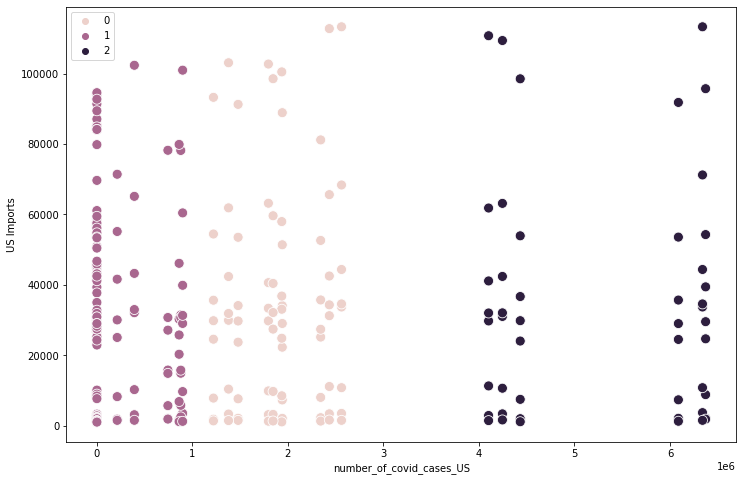

In [26]:
# Plot the clusters for the "US_imports" from Africa and "US_housing_price_index" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['number_of_covid_cases_US'], y=df_2['US_imports'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number_of_covid_cases_US') # Label x-axis.
plt.ylabel('US Imports') # Label y-axis.
plt.show()

The US housing price index is an indicator when there is an unstable economy in the US. Around mid-2007 the housing price index reached a high point since 1997, around 226. However, by Oct 2008 it fell below 200 and stayed in that range until May 2013. During this period, the values of imports from Africa increased. This is an indication that when there is a finical crisis, the US will increase the value of imports from Africa which is one of the poorest continents. I need to compare the US import activity from other continents to see if my hypothesis is true.

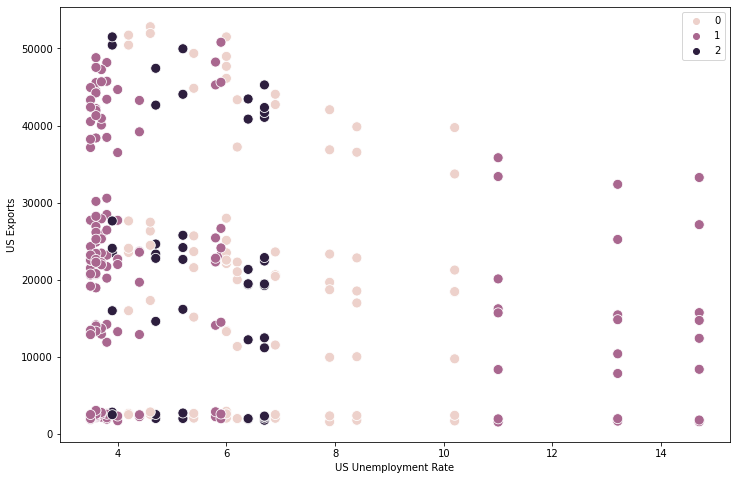

In [27]:
# Plot the clusters for the "US_exports" and "US_ unemployment_rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['US_ unemployment_rate'], y=df_2['US_exports'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('US Unemployment Rate') # Label x-axis.
plt.ylabel('US Exports') # Label y-axis.
plt.show()

The US unemployment rate is also an indicator of an unstable economy. The first time since 1997 the unemployment rate reached 7 was Dec of 2008 until it fell back below 7 in Nov 2013. During this period, it ranged from 7.2 to 10. You can see the value of US exports increased between around this range. This is also an indicator that when there is a finical crisis, the US will increase the value of exports from Africa which is one of the poorest continents. I need to compare the US export activity from other continents to see if my hypothesis is true.

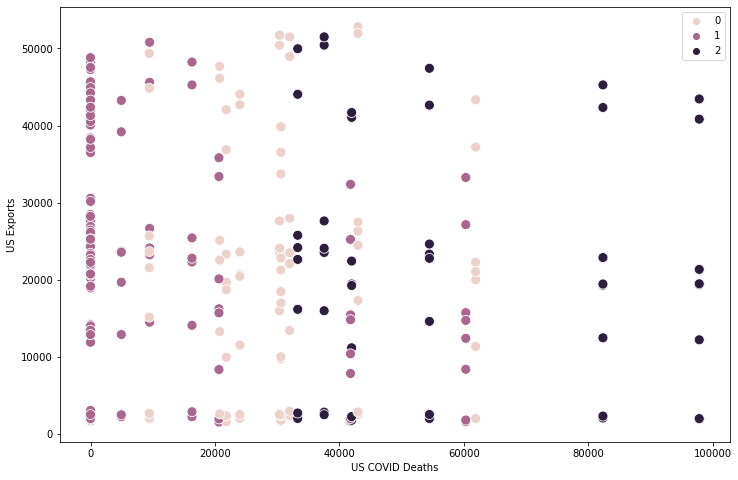

In [28]:
# Plot the clusters for the "US_imports" and "number_of_covid_deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['number_of_covid_deaths'], y=df_2['US_exports'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('US COVID Deaths') # Label x-axis.
plt.ylabel('US Exports') # Label y-axis.
plt.show()

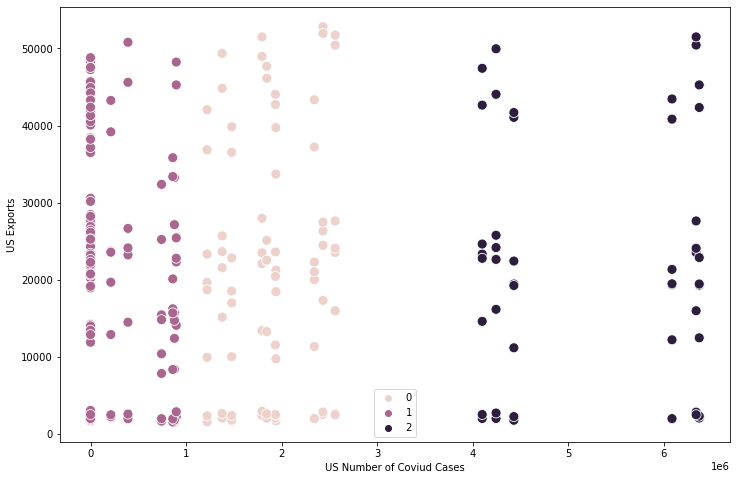

In [29]:
# Plot the clusters for the "US_exports" and "number_of_covid_cases_US" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['number_of_covid_cases_US'], y=df_2['US_exports'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('US Number of Covid Cases') # Label x-axis.
plt.ylabel('US Exports') # Label y-axis.
plt.show()

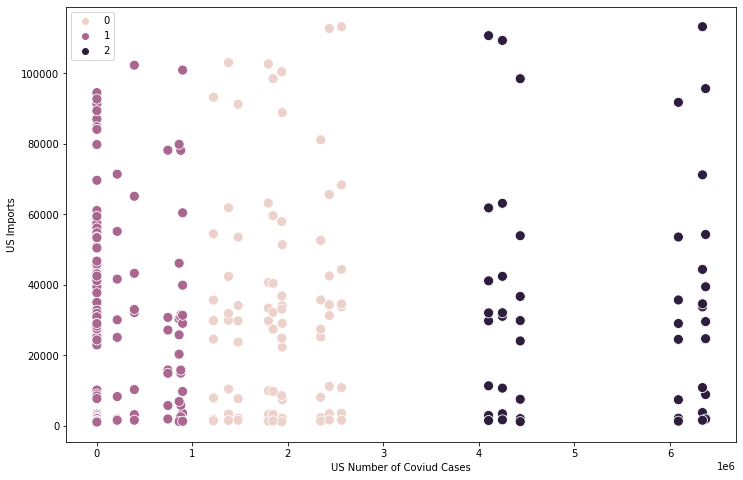

In [30]:
# Plot the clusters for the "US_imports" and "number_of_covid_cases_US" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['number_of_covid_cases_US'], y=df_2['US_imports'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('US Number of Covid Cases') # Label x-axis.
plt.ylabel('US Imports') # Label y-axis.
plt.show()

The number of US covid cases and US deaths is an indication of how sever the pandemic was from 2020 to 2021. When compared to the values of imports and exports, we see how it could have impacted US trade. When looking at the value of US imports and exports and the amount of Covid cases and deaths, there is not much change. I do see in slight increase in the amount of US exports from Africa as the number of Covid deaths. I need to look at this same information with richer continents to compare.

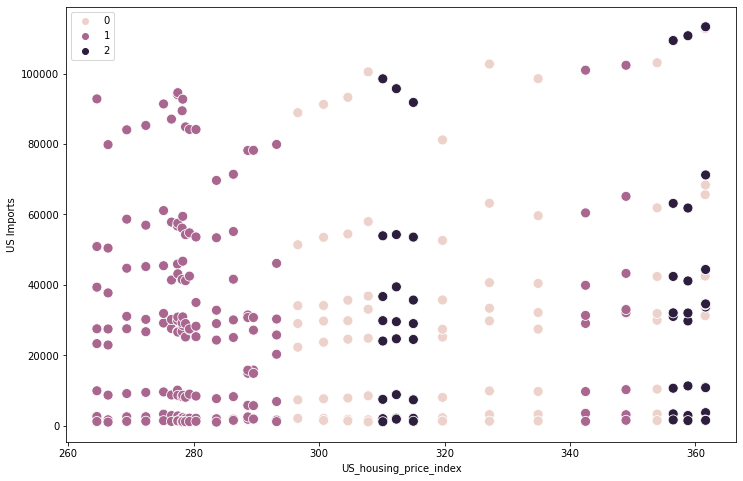

In [32]:
# Plot the clusters for the "US_imports" and "number_of_covid_cases_US" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['US_housing_price_index'], y=df_2['US_imports'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('US_housing_price_index') # Label x-axis.
plt.ylabel('US Imports') # Label y-axis.
plt.show()

In [55]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [62]:
df_2.groupby('clusters').agg({'US_imports':['mean', 'median'], 
                         'US_exports':['mean', 'median'], 
                         'US_housing_price_index':['mean', 'median'],
                          'number_of_covid_cases_US':['mean', 'median']})

US_imports                US_exports               \
                 mean       median         mean       median   
clusters                                                       
0         3938.040730  2916.751897  1784.544775  1828.020260   
1         2694.568115  2765.407503  2093.368297  2057.201149   
2         2755.571354  2563.931540  2114.619380  2019.923042   

         US_housing_price_index         number_of_covid_cases_US             
                           mean  median                     mean     median  
clusters                                                                     
0                     196.13581  194.48             1.403216e+04        0.0  
1                     326.85400  323.42             1.893192e+06  1890137.5  
2                     335.73000  335.74             5.263558e+06  5260293.5

I believe I need to look at only the dates when covid was around as it is impacting the mean and median of the number of covid cases. I need to also include more variable that indicate when there is a financial crisis and pandemic. I also need to compare this information with the rest of the continents.